<a href="https://colab.research.google.com/github/jacobbstephen/ML_Programs/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')


In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]].values

WCSS -> Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters
#init='k-means++' is a method for initialization that improves the convergence of k-means.

wcss = []

for i in range(1,11):
  #load the kmeans cluster model

  #n_clusters means no of clusters, 42  init-> intializing random no
  kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
  kmeans.fit(X)#fit the kmeans to our data data

  wcss.append(kmeans.inertia_)# kmeans.inertia_ gives the wcss value for each cluster and stores the value in the list
  #The inertia represents the sum of squared distances of samples to their closest cluster center.


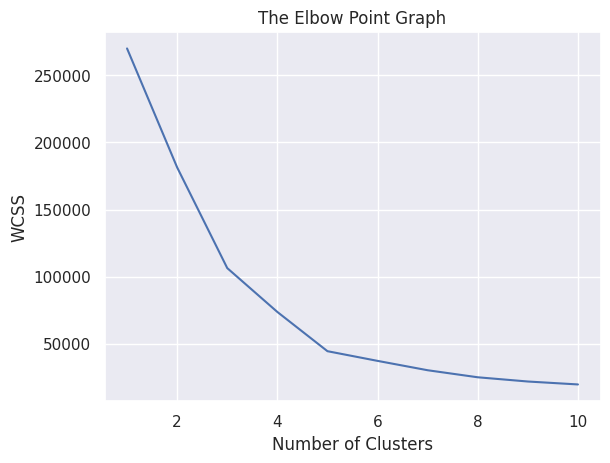

In [ ]:
# plot the elbow grraph
sns.set()# gives the basic parameter for the graph
plt.plot(range(1,11), wcss)#(Xaxis, Y axis)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)# returns the cluster no for each datapoint

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the data

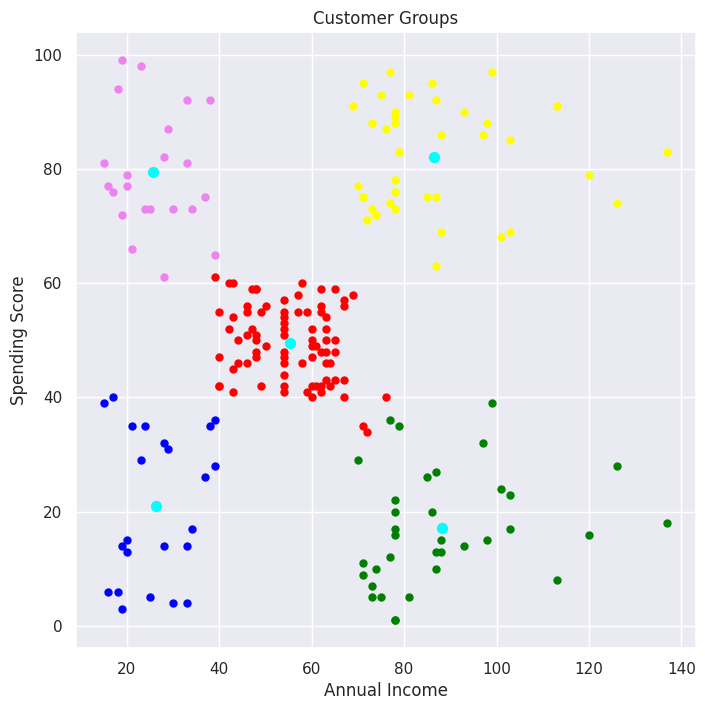

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=25, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=25, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=25, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=25, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=25, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()